In [1]:
from eisplottingtool import EISFrame

path1 = r"G:\Collaborators\Sauter Ulrich\Projects\EIS Tail\Data"
path2 = r"C:\Users\ueli\Desktop\Sauter Ulrich\Projects\EIS Tail\Data"
file = r"\20201204_Rabeb_LLZTO_Batch4_rAcetonitryle-3days_Li300C_3mm_0p7th_PT_C15.mpr"

print(file)

testFrame = EISFrame(path=path1 + file)

testFrame.load(path1 + file)

data =testFrame.df.copy()


\20201204_Rabeb_LLZTO_Batch4_rAcetonitryle-3days_Li300C_3mm_0p7th_PT_C15.mpr


In [2]:
print(data.columns)

Index(['I Range', 'time', 'control_I', 'Ewe', 'I', 'dq', '(Q-Qo)', 'Energy',
       'freq', '|Z|', 'Phase(Z)', 'Q charge/discharge', 'half cycle', 'Ece',
       '<Ece>', '|Ece|', 'Phase(Zce)', '|Zce|', 'Re(Zce)', '-Im(Zce)',
       'Phase(Zwe-ce)', '|Zwe-ce|', 'Re(Zwe-ce)', '-Im(Zwe-ce)',
       'Energy charge', 'Energy discharge', 'Capacitance charge',
       'Capacitance discharge', 'mode', 'ox/red', 'error', 'control changes',
       'Ns changes', 'counter inc.', 'uts'],
      dtype='object')


In [30]:
data['control changes']

z cycle  Ns
0        0     0
         0     0
         0     0
         0     0
         0     0
              ..
69       5     0
         5     0
         5     0
         5     0
         6     0
Name: control changes, Length: 514968, dtype: int64

In [34]:
data.loc[(0, 1)][testFrame.eis_params["frequency"]]

z cycle  Ns
0        1     0.0
         1     0.0
         1     0.0
         1     0.0
         1     0.0
              ... 
         1     0.0
         1     0.0
         1     0.0
         1     0.0
         1     0.0
Name: freq, Length: 7212, dtype: float64

In [31]:
data.loc[(0, 1), :]

I Range           time  control_I       Ewe         I  \
z cycle Ns                                                          
0       1        14      59.999998      0.007  0.000162  0.000070   
        1        14      60.004998      0.007  0.002223  0.001821   
        1        14      60.009798      0.007  0.004240  0.003501   
        1        14      60.014598      0.007  0.006281  0.005182   
        1        14      60.019398      0.007  0.008345  0.006863   
...             ...            ...        ...       ...       ...   
        1        14  109192.550478      0.007  0.017516  0.007003   
        1        14  109202.550676      0.007  0.017500  0.007003   
        1        14  109212.550874      0.007  0.017499  0.007003   
        1        14  109222.551071      0.007  0.017521  0.007003   
        1        14  109230.506869      0.007  0.017507  0.007003   

                      dq        (Q-Qo)        Energy  freq  |Z|  ...  \
z cycle Ns                                                       ...   
0       1   3.890276e-10  3.890276e-10  6.315250e-17   0.0  0.0  ...   
        1   9.725861e-09  1.011489e-08  2.168783e-14   0.0  0.0  ...   
        1   9.336847e-09  1.945174e-08  6.127523e-14   0.0  0.0  ...   
        1   9.336833e-09  2.878857e-08  1.199166e-13   0.0  0.0  ...   
        1   9.337101e-09  3.812567e-08  1.978336e-13   0.0  0.0  ...   
...                  ...           ...           ...   ...  ...  ...   
        1   1.945219e-05  6.995014e-02  3.054203e-06   0.0  0.0  ...   
        1   1.945218e-05  6.996959e-02  3.054543e-06   0.0  0.0  ...   
        1   1.945216e-05  6.998904e-02  3.054884e-06   0.0  0.0  ...   
        1   1.945218e-05  7.000849e-02  3.055224e-06   0.0  0.0  ...   
        1   1.547545e-05  7.002397e-02  3.055495e-06   0.0  0.0  ...   

            Energy discharge  Capacitance charge  Capacitance discharge  mode  \
z cycle Ns                                                                      
0       1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
...                      ...                 ...                    ...   ...   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   
        1                0.0                 0.0                    0.0     1   

            ox/red  error  control changes  Ns changes  counter inc.  \
z cycle Ns                                                             
0       1        1      0                1           1             0   
        1        1      0                1           0             0   
        1        1      0                1           0             0   
        1        1      0                1           0             0   
        1        1      0                1           0             0   
...            ...    ...              ...         ...           ...   
        1        1      0                0           0             1   
        1        1      0                0           0             1   
        1        1      0                0           0             1   
        1        1      0                0           0             1   
        1        1      0                0           0             1   

                     uts  
z cycle Ns                
0       1   1.607086e+09  
        1   1.607086e+09  
        1   1.607086e+09  
        1   1.607086e+09  
        1   1.607086e+09

In [6]:
data.loc[(0, 4)]

I Range          time  control_I       Ewe         I   dq  \
z cycle Ns                                                              
0       4        12  72362.425748        0.0 -0.001705 -0.000327  0.0   
        4        12  72363.754740        0.0 -0.001565 -0.000171  0.0   
        4        12  72365.083753        0.0 -0.001529 -0.000126  0.0   
        4        12  72366.412743        0.0 -0.001516 -0.000063  0.0   
        4        12  72367.741716        0.0 -0.001493 -0.000212  0.0   
...             ...           ...        ...       ...       ...  ...   
        4        13  72635.010072        0.0 -0.001519 -0.000453  0.0   
        4        13  72685.269755        0.0 -0.001511 -0.000456  0.0   
        4        13  72748.771451        0.0 -0.001516 -0.000452  0.0   
        4        13  72829.054847        0.0 -0.001515 -0.000460  0.0   
        4        13  72930.455563        0.0 -0.001506 -0.000467  0.0   

              (Q-Qo)    Energy          freq          |Z|  ...  \
z cycle Ns                                                 ...   
0       4   0.000059  0.000002  1.000019e+06   596.795044  ...   
        4   0.000059  0.000002  7.916791e+05   625.290649  ...   
        4   0.000059  0.000002  6.267629e+05   678.947205  ...   
        4   0.000059  0.000002  4.961958e+05   751.490295  ...   
        4   0.000059  0.000002  3.928240e+05   834.806763  ...   
...              ...       ...           ...          ...  ...   
        4   0.000030  0.000002  2.547112e-01  1371.363403  ...   
        4   0.000024  0.000002  2.017066e-01  1389.139771  ...   
        4   0.000017  0.000002  1.595951e-01  1407.061157  ...   
        4   0.000009  0.000002  1.262034e-01  1426.464722  ...   
        4  -0.000003  0.000002  9.990411e-02  1445.889526  ...   

            Energy discharge  Capacitance charge  Capacitance discharge  mode  \
z cycle Ns                                                                      
0       4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
...                      ...                 ...                    ...   ...   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   
        4       9.975237e-07                 0.0                    0.0     3   

            ox/red  error  control changes  Ns changes  counter inc.  \
z cycle Ns                                                             
0       4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
...            ...    ...              ...         ...           ...   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   
        4        0      0                1           0             0   

                     uts  
z cycle Ns                
0       4   1.607158e+09  
        4   1.607158e+09  
        4   1.607158e+09  
        4   1.607158e+09  
        4   1.607158e+09  
...                  ..

In [14]:
data.loc[(slice(None), 1), testFrame.eis_params["frequency"]]

z cycle  Ns
0        1     0.0
         1     0.0
         1     0.0
         1     0.0
         1     0.0
              ... 
68       1     0.0
         1     0.0
         1     0.0
         1     0.0
         1     0.0
Name: freq, Length: 252420, dtype: float64

In [22]:
import eclabfiles as ecf
testData = ecf.to_df(path1 + file)



C:\Users\ulsa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ulsa\AppData\Local\Temp/ipykernel_2936/2459570572.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotData["logfreq"] = np.log10(testData["freq"])


<AxesSubplot:>

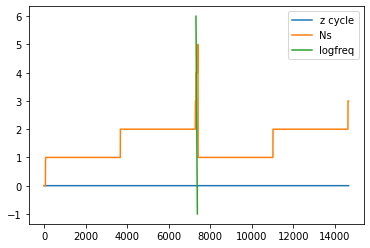

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mask = testData["z cycle"] == 0
plotData = testData[mask]
plotData["logfreq"] = np.log10(testData["freq"])
plotData.plot(y=["z cycle", "Ns", "logfreq"])

In [36]:
for p in testData.attrs['params']:
    print(p["ctrl_type"])

4
0
0
4
8
4
5


In [37]:
testData

,Ns,I Range,time,control_I,Ewe,I,dq,(Q-Qo),Energy,freq,...,Energy discharge,Capacitance charge,Capacitance discharge,mode,ox/red,error,control changes,Ns changes,counter inc.,uts
0,0,14,0.000000e+00,0.0,0.000054,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,3,0,0,0,0,0,1.607086e+09
1,0,14,1.000000e+00,0.0,0.000022,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,3,0,0,0,0,0,1.607086e+09
2,0,14,2.000000e+00,0.0,0.000027,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,3,0,0,0,0,0,1.607086e+09
3,0,14,3.000000e+00,0.0,0.000024,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,3,0,0,0,0,0,1.607086e+09
4,0,14,4.000000e+00,0.0,0.000037,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,3,0,0,0,0,0,1.607086e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514963,5,14,5.122004e+06,0.0,-0.001546,0.0,0.0,0.000466,0.000277,0.0,...,0.000003,0.0,0.0,3,0,0,0,0,1,1.612208e+09
514964,5,14,5.122014e+06,0.0,-0.001540,0.0,0.0,0.000466,0.000277,0.0,...,0.000003,0.0,0.0,3,0,0,0,0,1,1.612208e+09
514965,5,14,5.122024e+06,0.0,-0.001521,0.0,0.0,0.000466,0.000277,0.0,...,0.000003,0.0,0.0,3,0,0,0,1,1,1.612208e+09
514966,5,14,5.122024e+06,0.0,-0.001519,0.0,0.0,0.000466,0.000277,0.0,...,0.000003,0.0,0.0,3,0,0,0,0,1,1.612208e+09
